In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
df = pd.read_csv('augmented_data_400.csv')

In [ ]:
df['target'].value_counts()

0    300
2     44
1     25
3     16
4     15
Name: target, dtype: int64

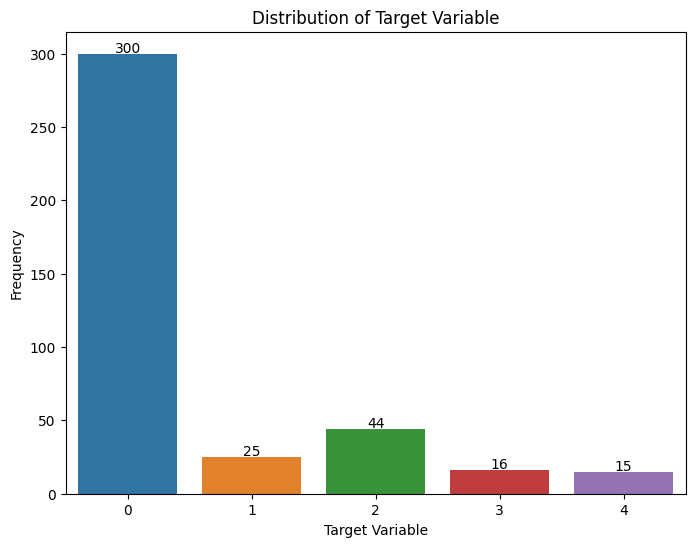

In [ ]:
# Plot bar graph with frequencies using seaborn
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="target")

# Add individual counts on top of each bar
for i in range(len(df["target"].unique())):
    count = df[df["target"] == i]["target"].count()
    plt.text(i, count+1, count, ha='center', fontsize=10)

# Add labels and title
plt.xlabel("Target Variable")
plt.ylabel("Frequency")
plt.title("Distribution of Target Variable")

# Show the plot
plt.show()

## Multinomial/Multiclass logistic regression with Softmax activation function

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Accuracy for Validation Set: 0.6833
F1 Score for Validation Set:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        48
           1       0.00      0.00      0.00         5
           2       0.14      0.33      0.20         3
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         0

    accuracy                           0.68        60
   macro avg       0.20      0.23      0.21        60
weighted avg       0.67      0.68      0.68        60

Accuracy for Test Set: 0.6167
F1 Score for Test Set:
              precision    recall  f1-score   support

           0       0.75      0.84      0.79        43
           1       0.00      0.00      0.00         3
           2       0.10      0.14      0.12         7
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         4

    accuracy                           0.62        60
   macro avg 

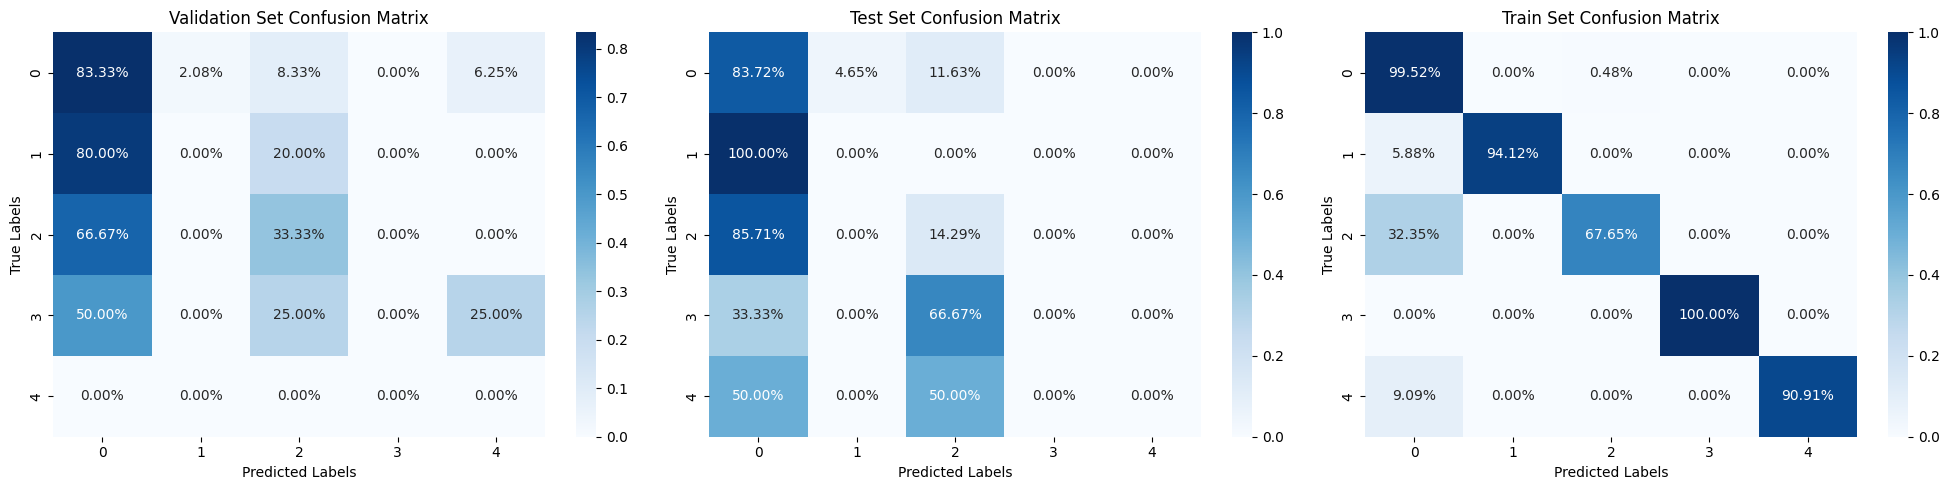

In [ ]:
# Create X and y matrices
X = df.drop('target', axis=1)
y = df['target']

# Divide the dataset into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Train the model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)       # max iter 1000 C na
model.fit(X_train, y_train)

# Predict the target variable for test and validation sets
y_pred_test = model.predict(X_test)
y_pred_val = model.predict(X_val)
y_pred_train = model.predict(X_train)

# Calculate accuracy and f1 score for test and validation sets
accuracy_test = model.score(X_test, y_test)
f1_test = classification_report(y_test, y_pred_test)
accuracy_val = model.score(X_val, y_val)
f1_val = classification_report(y_val, y_pred_val)
accuracy_train = model.score(X_train, y_train)
f1_train = classification_report(y_train, y_pred_train)

# Print accuracy and f1 score for test and validation sets
print('Accuracy for Validation Set: {:.4f}'.format(accuracy_val))
print('F1 Score for Validation Set:')
print(f1_val)
print('Accuracy for Test Set: {:.4f}'.format(accuracy_test))
print('F1 Score for Test Set:')
print(f1_test)
print('Accuracy for Train Set: {:.4f}'.format(accuracy_train))
print('F1 Score for Train Set:')
print(f1_train)

# Plot confusion matrix for test, train, and validation sets
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

for i, dataset in enumerate(['Validation', 'Test', 'Train']):
    if dataset == 'Validation':
        X_dataset = X_val
        y_dataset = y_val
    elif dataset == 'Test':
        X_dataset = X_test
        y_dataset = y_test
    else:
        X_dataset = X_train
        y_dataset = y_train

    y_pred_dataset = model.predict(X_dataset)
    cm = confusion_matrix(y_dataset, y_pred_dataset, normalize='true')
    sns.heatmap(cm, annot=True, cmap='Blues', ax=ax[i], fmt='.2%')
    ax[i].set_title(f'{dataset} Set Confusion Matrix')
    ax[i].set_xlabel('Predicted Labels')
    ax[i].set_ylabel('True Labels')
plt.tight_layout()
plt.show()

### With L2 regularization C=0.01

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Accuracy for Validation Set: 0.8000
F1 Score for Validation Set:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        48
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         4

    accuracy                           0.80        60
   macro avg       0.20      0.25      0.22        60
weighted avg       0.64      0.80      0.71        60

Accuracy for Test Set: 0.7167
F1 Score for Test Set:
              precision    recall  f1-score   support

           0       0.72      1.00      0.83        43
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         4

    accuracy                           0.72        60
   macro avg       0.14      0.20      0.17        60
weighted avg 

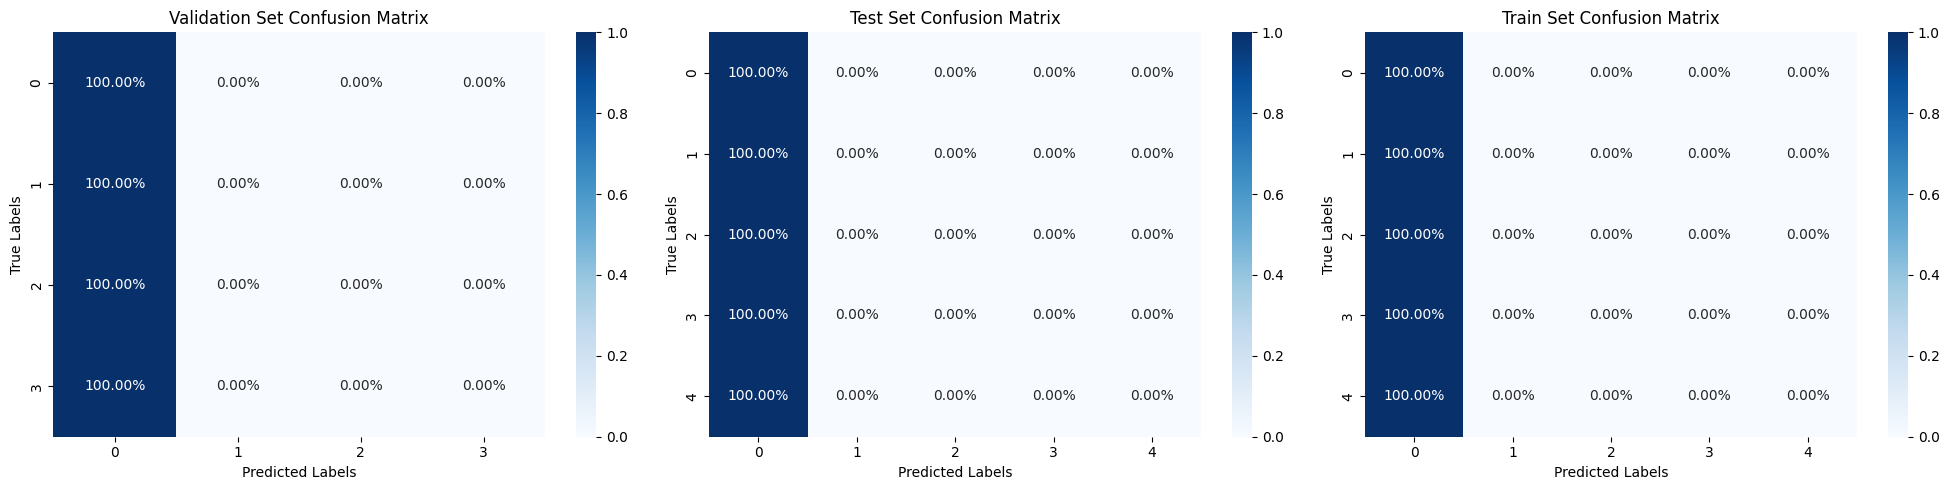

In [ ]:
# Create X and y matrices
X = df.drop('target', axis=1)
y = df['target']

# Divide the dataset into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Train the model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, penalty='l2', C=0.01)       # max iter 1000 C na
model.fit(X_train, y_train)

# Predict the target variable for test and validation sets
y_pred_test = model.predict(X_test)
y_pred_val = model.predict(X_val)
y_pred_train = model.predict(X_train)

# Calculate accuracy and f1 score for test and validation sets
accuracy_test = model.score(X_test, y_test)
f1_test = classification_report(y_test, y_pred_test)
accuracy_val = model.score(X_val, y_val)
f1_val = classification_report(y_val, y_pred_val)
accuracy_train = model.score(X_train, y_train)
f1_train = classification_report(y_train, y_pred_train)

# Print accuracy and f1 score for test and validation sets
print('Accuracy for Validation Set: {:.4f}'.format(accuracy_val))
print('F1 Score for Validation Set:')
print(f1_val)
print('Accuracy for Test Set: {:.4f}'.format(accuracy_test))
print('F1 Score for Test Set:')
print(f1_test)
print('Accuracy for Train Set: {:.4f}'.format(accuracy_train))
print('F1 Score for Train Set:')
print(f1_train)

# Plot confusion matrix for test, train, and validation sets
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

for i, dataset in enumerate(['Validation', 'Test', 'Train']):
    if dataset == 'Validation':
        X_dataset = X_val
        y_dataset = y_val
    elif dataset == 'Test':
        X_dataset = X_test
        y_dataset = y_test
    else:
        X_dataset = X_train
        y_dataset = y_train

    y_pred_dataset = model.predict(X_dataset)
    cm = confusion_matrix(y_dataset, y_pred_dataset, normalize='true')
    sns.heatmap(cm, annot=True, cmap='Blues', ax=ax[i], fmt='.2%')
    ax[i].set_title(f'{dataset} Set Confusion Matrix')
    ax[i].set_xlabel('Predicted Labels')
    ax[i].set_ylabel('True Labels')
plt.tight_layout()
plt.show()

### With Early stopping

Validation accuracy has not improved in 5 epochs. Stopping early.
Validation accuracy: 0.6833
Test accuracy: 0.6167
Train accuracy: 0.9500


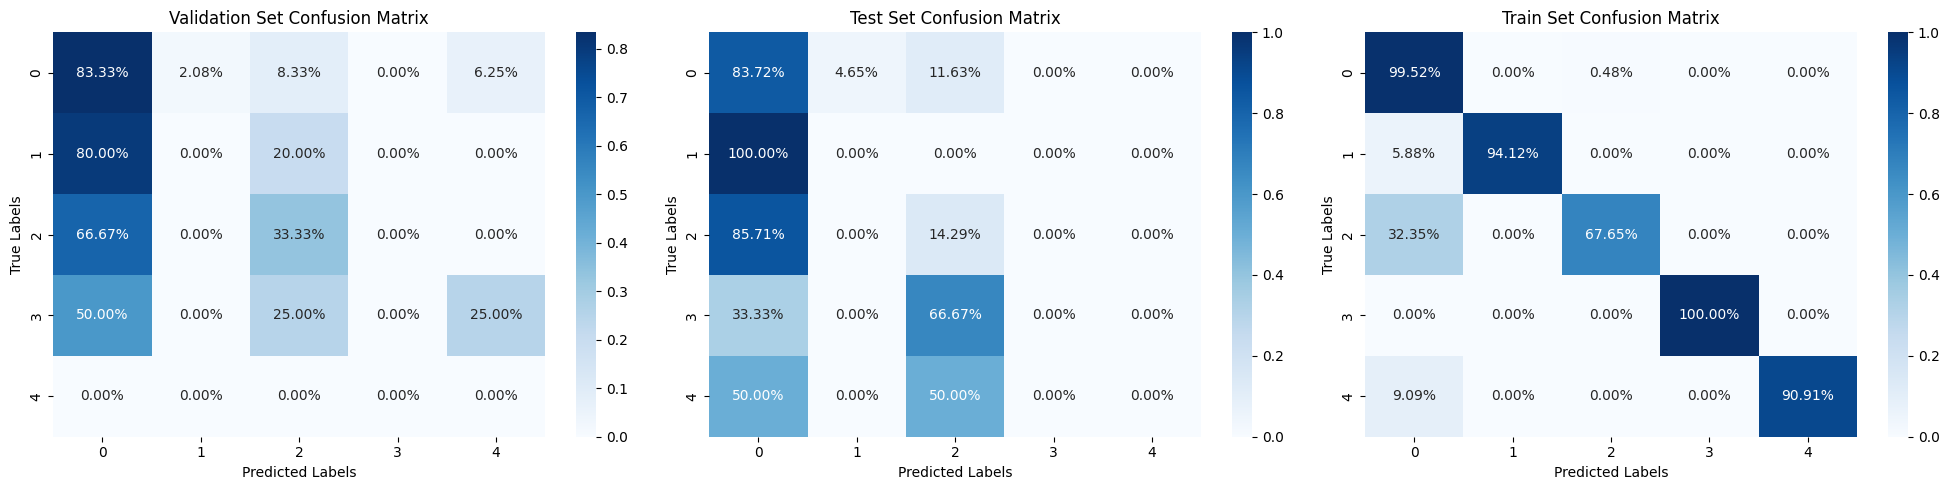

In [ ]:
# Create X and y matrices
X = df.drop('target', axis=1)
y = df['target']

# Divide the dataset into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Train the model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)       # max iter 1000 C na

# Train model with early stopping
best_val_acc = 0
best_weights = None
patience = 5
epochs_since_improvement = 0
for epoch in range(100):
    # Train for one epoch
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_preds)

    # Evaluate on validation set
    val_preds = model.predict(X_val)
    val_acc = accuracy_score(y_val, val_preds)

    # Check for improvement
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_weights = model.coef_
        epochs_since_improvement = 0
    else:
        epochs_since_improvement += 1

    # Early stopping
    if epochs_since_improvement >= patience:
        print(f'Validation accuracy has not improved in {patience} epochs. Stopping early.')
        break

# Evaluate on test set
model.coef_ = best_weights  # Set model weights to those of best validation epoch
test_preds = model.predict(X_test)
test_acc = accuracy_score(y_test, test_preds)

# Display results
print(f'Validation accuracy: {best_val_acc:.4f}')
print(f'Test accuracy: {test_acc:.4f}')
print(f'Train accuracy: {train_acc:.4f}')

# Plot confusion matrix for test, train, and validation sets
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

for i, dataset in enumerate(['Validation', 'Test', 'Train']):
    if dataset == 'Validation':
        X_dataset = X_val
        y_dataset = y_val
    elif dataset == 'Test':
        X_dataset = X_test
        y_dataset = y_test
    else:
        X_dataset = X_train
        y_dataset = y_train

    y_pred_dataset = model.predict(X_dataset)
    cm = confusion_matrix(y_dataset, y_pred_dataset, normalize='true')
    sns.heatmap(cm, annot=True, cmap='Blues', ax=ax[i], fmt='.2%')
    ax[i].set_title(f'{dataset} Set Confusion Matrix')
    ax[i].set_xlabel('Predicted Labels')
    ax[i].set_ylabel('True Labels')
plt.tight_layout()
plt.show()

### Implementing grid search to find best configuration

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best hyperparameters:  {'C': 0.001, 'max_iter': 100, 'multi_class': 'ovr', 'solver': 'lbfgs'}
Test accuracy:  0.8
Test F1 score:  0.7111111111111111
Validation accuracy:  0.7166666666666667
Validation F1 score:  0.5983818770226537


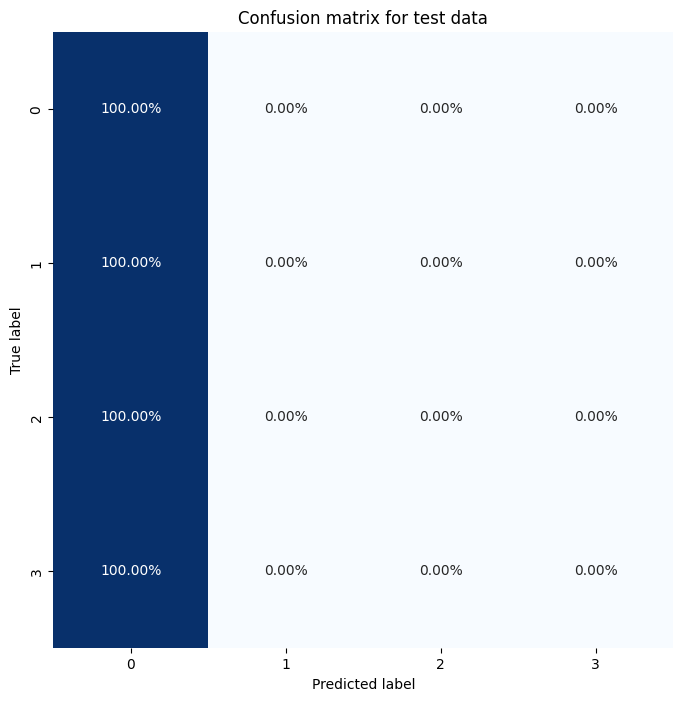

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Split data into features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Define hyperparameters to search over
params = {
    'C': np.logspace(-3, 3, 7),
    'max_iter': [100, 500, 1000],
    'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
    'multi_class': ['ovr', 'multinomial']
}

# Initialize logistic regression model
logreg = LogisticRegression()

# Perform grid search with cross-validation
grid_search = GridSearchCV(logreg, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Train model with best hyperparameters on training data
best_logreg = LogisticRegression(**grid_search.best_params_)
best_logreg.fit(X_train, y_train)

# Make predictions on test and validation data
y_pred_test = best_logreg.predict(X_test)
y_pred_val = best_logreg.predict(X_val)

# Calculate accuracy and F1 score on test and validation data
acc_test = accuracy_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test, average='weighted')
acc_val = accuracy_score(y_val, y_pred_val)
f1_val = f1_score(y_val, y_pred_val, average='weighted')

# Print results
print("Test accuracy: ", acc_test)
print("Test F1 score: ", f1_test)
print("Validation accuracy: ", acc_val)
print("Validation F1 score: ", f1_val)

# Plot confusion matrix for test data
cm_test = confusion_matrix(y_test, y_pred_test)
cm_test_percent = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm_test_percent, annot=True, fmt='.2%', cmap='Blues', cbar=False)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for test data')
plt.show()

### Model with best config

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Accuracy for Validation Set: 0.8000
F1 Score for Validation Set:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        48
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         4

    accuracy                           0.80        60
   macro avg       0.20      0.25      0.22        60
weighted avg       0.64      0.80      0.71        60

Accuracy for Test Set: 0.7167
F1 Score for Test Set:
              precision    recall  f1-score   support

           0       0.72      1.00      0.83        43
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         4

    accuracy                           0.72        60
   macro avg       0.14      0.20      0.17        60
weighted avg 

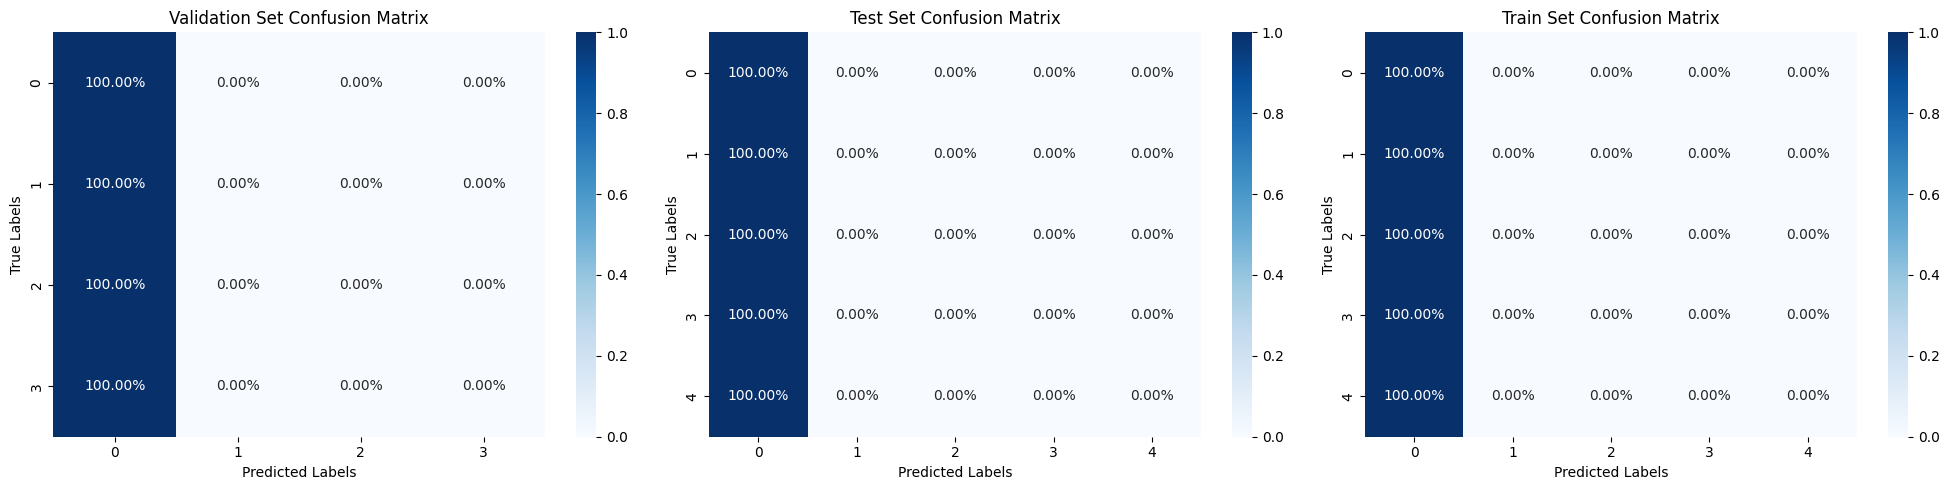

In [ ]:
# Create X and y matrices
X = df.drop('target', axis=1)
y = df['target']

# Divide the dataset into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Train the model
model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=100, C=0.001)       # max iter 1000 C na
model.fit(X_train, y_train)

# Predict the target variable for test and validation sets
y_pred_test = model.predict(X_test)
y_pred_val = model.predict(X_val)
y_pred_train = model.predict(X_train)

# Calculate accuracy and f1 score for test and validation sets
accuracy_test = model.score(X_test, y_test)
f1_test = classification_report(y_test, y_pred_test)
accuracy_val = model.score(X_val, y_val)
f1_val = classification_report(y_val, y_pred_val)
accuracy_train = model.score(X_train, y_train)
f1_train = classification_report(y_train, y_pred_train)

# Print accuracy and f1 score for test and validation sets
print('Accuracy for Validation Set: {:.4f}'.format(accuracy_val))
print('F1 Score for Validation Set:')
print(f1_val)
print('Accuracy for Test Set: {:.4f}'.format(accuracy_test))
print('F1 Score for Test Set:')
print(f1_test)
print('Accuracy for Train Set: {:.4f}'.format(accuracy_train))
print('F1 Score for Train Set:')
print(f1_train)

# Plot confusion matrix for test, train, and validation sets
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

for i, dataset in enumerate(['Validation', 'Test', 'Train']):
    if dataset == 'Validation':
        X_dataset = X_val
        y_dataset = y_val
    elif dataset == 'Test':
        X_dataset = X_test
        y_dataset = y_test
    else:
        X_dataset = X_train
        y_dataset = y_train

    y_pred_dataset = model.predict(X_dataset)
    cm = confusion_matrix(y_dataset, y_pred_dataset, normalize='true')
    sns.heatmap(cm, annot=True, cmap='Blues', ax=ax[i], fmt='.2%')
    ax[i].set_title(f'{dataset} Set Confusion Matrix')
    ax[i].set_xlabel('Predicted Labels')
    ax[i].set_ylabel('True Labels')
plt.tight_layout()
plt.show()

## Multinomial Naive Bayes Classifier

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Accuracy for Validation Set: 0.7333
F1 Score for Validation Set:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        48
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         3
           3       1.00      0.25      0.40         4
           4       0.00      0.00      0.00         0

    accuracy                           0.73        60
   macro avg       0.36      0.23      0.25        60
weighted avg       0.72      0.73      0.71        60

Accuracy for Test Set: 0.6333
F1 Score for Test Set:
              precision    recall  f1-score   support

           0       0.73      0.88      0.80        43
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         4

    accuracy                           0.63        60
   macro avg 

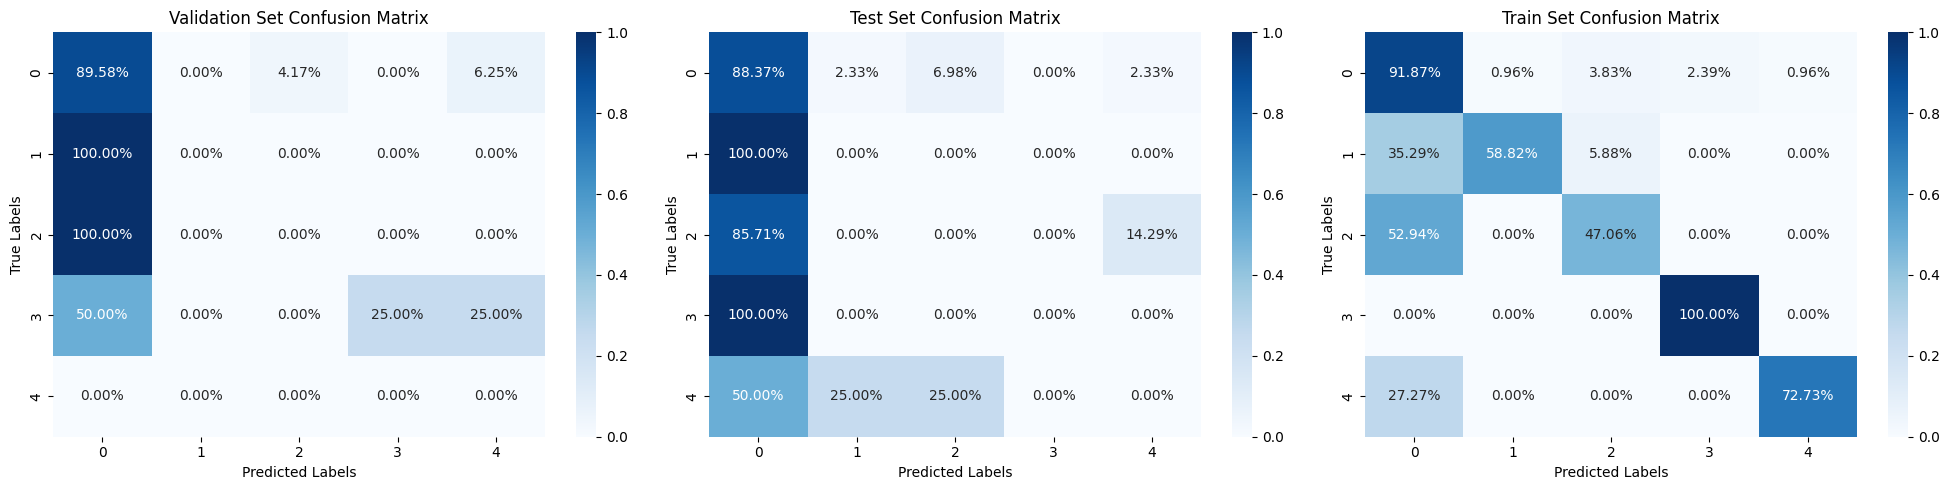

In [ ]:
# Create X and y matrices
X = df.drop('target', axis=1)
y = df['target']

# Divide the dataset into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Train the model
model = CategoricalNB()       # max iter 1000 C na
model.fit(X_train, y_train)

# Predict the target variable for test and validation sets
y_pred_test = model.predict(X_test)
y_pred_val = model.predict(X_val)
y_pred_train = model.predict(X_train)

# Calculate accuracy and f1 score for test and validation sets
accuracy_test = model.score(X_test, y_test)
f1_test = classification_report(y_test, y_pred_test)
accuracy_val = model.score(X_val, y_val)
f1_val = classification_report(y_val, y_pred_val)
accuracy_train = model.score(X_train, y_train)
f1_train = classification_report(y_train, y_pred_train)

# Print accuracy and f1 score for test and validation sets
print('Accuracy for Validation Set: {:.4f}'.format(accuracy_val))
print('F1 Score for Validation Set:')
print(f1_val)
print('Accuracy for Test Set: {:.4f}'.format(accuracy_test))
print('F1 Score for Test Set:')
print(f1_test)
print('Accuracy for Train Set: {:.4f}'.format(accuracy_train))
print('F1 Score for Train Set:')
print(f1_train)

# Plot confusion matrix for test, train, and validation sets
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

for i, dataset in enumerate(['Validation', 'Test', 'Train']):
    if dataset == 'Validation':
        X_dataset = X_val
        y_dataset = y_val
    elif dataset == 'Test':
        X_dataset = X_test
        y_dataset = y_test
    else:
        X_dataset = X_train
        y_dataset = y_train

    y_pred_dataset = model.predict(X_dataset)
    cm = confusion_matrix(y_dataset, y_pred_dataset, normalize='true')
    sns.heatmap(cm, annot=True, cmap='Blues', ax=ax[i], fmt='.2%')
    ax[i].set_title(f'{dataset} Set Confusion Matrix')
    ax[i].set_xlabel('Predicted Labels')
    ax[i].set_ylabel('True Labels')
plt.tight_layout()
plt.show()

## Random Forest Decision Tree (also with softmax AF)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Accuracy for Validation Set: 0.8000
F1 Score for Validation Set:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        48
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         4

    accuracy                           0.80        60
   macro avg       0.20      0.25      0.22        60
weighted avg       0.64      0.80      0.71        60

Accuracy for Test Set: 0.7167
F1 Score for Test Set:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84        43
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         4

    accuracy                           0.72        60
   macro avg       0.15      0.20      0.17        60
weighted avg 

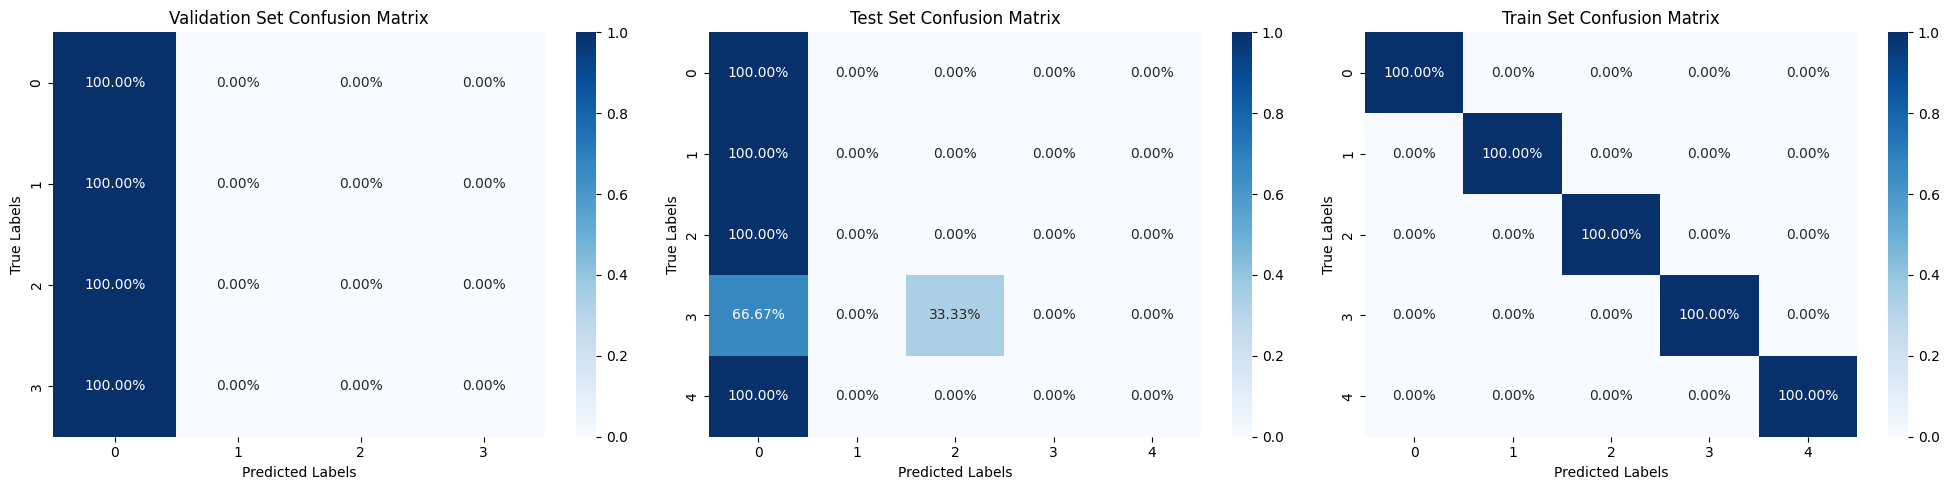

In [ ]:
# Create X and y matrices
X = df.drop('target', axis=1)
y = df['target']

# Divide the dataset into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Train the model
model = RandomForestClassifier()       # max iter 1000 C na
model.fit(X_train, y_train)

# Predict the target variable for test and validation sets
y_pred_test = model.predict(X_test)
y_pred_val = model.predict(X_val)
y_pred_train = model.predict(X_train)

# Calculate accuracy and f1 score for test and validation sets
accuracy_test = model.score(X_test, y_test)
f1_test = classification_report(y_test, y_pred_test)
accuracy_val = model.score(X_val, y_val)
f1_val = classification_report(y_val, y_pred_val)
accuracy_train = model.score(X_train, y_train)
f1_train = classification_report(y_train, y_pred_train)

# Print accuracy and f1 score for test and validation sets
print('Accuracy for Validation Set: {:.4f}'.format(accuracy_val))
print('F1 Score for Validation Set:')
print(f1_val)
print('Accuracy for Test Set: {:.4f}'.format(accuracy_test))
print('F1 Score for Test Set:')
print(f1_test)
print('Accuracy for Train Set: {:.4f}'.format(accuracy_train))
print('F1 Score for Train Set:')
print(f1_train)

# Plot confusion matrix for test, train, and validation sets
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

for i, dataset in enumerate(['Validation', 'Test', 'Train']):
    if dataset == 'Validation':
        X_dataset = X_val
        y_dataset = y_val
    elif dataset == 'Test':
        X_dataset = X_test
        y_dataset = y_test
    else:
        X_dataset = X_train
        y_dataset = y_train

    y_pred_dataset = model.predict(X_dataset)
    cm = confusion_matrix(y_dataset, y_pred_dataset, normalize='true')
    sns.heatmap(cm, annot=True, cmap='Blues', ax=ax[i], fmt='.2%')
    ax[i].set_title(f'{dataset} Set Confusion Matrix')
    ax[i].set_xlabel('Predicted Labels')
    ax[i].set_ylabel('True Labels')
plt.tight_layout()
plt.show()